# PROJECT 1: Mercedes-Benz Greener Manufacturing

#### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:
1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

### Importing important libraries and classes

In [220]:
import pandas as pd
import numpy as np
from numpy import sqrt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import model_selection, preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#### Importing the dataset and executing the same

In [239]:
df_train1=pd.read_csv("train_MB.csv")
df_test1=pd.read_csv("test_MB.csv")
df_train1.shape

(4209, 378)

In [240]:
df_train1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [241]:
df_test1.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#### Action-1: Check for columns for variance equal to zero

In [242]:
df=pd.DataFrame([df_train1.var(axis=0)])
df.columns[(df == 0).all()]

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [243]:
df_train1=df_train1.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],axis=1)
df_train1.shape

(4209, 366)

In [244]:
df=pd.DataFrame([df_test1.var(axis=0)])
df.columns[(df == 0).all()]

Index(['X257', 'X258', 'X295', 'X296', 'X369'], dtype='object')

In [245]:
df_test1=df_test1.drop(['X257', 'X258', 'X295', 'X296', 'X369'],axis=1)
df_test1.shape

(4209, 372)

Variance of any column is not equal to zero now

#### Action 2: Check for null and unique values for test and train sets.

In [246]:
df_train1.columns[df_train1.isnull().any()]

Index([], dtype='object')

In [247]:
df_test1.columns[df_test1.isnull().any()]

Index([], dtype='object')

In [267]:
df_train1.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 366, dtype: int64

No null values present in the test and train data

In [248]:
categorical_feats = df_train1.dtypes[df_train1.dtypes == "object"].index
print("Number of Categorical features: ", (categorical_feats))
categorical_feats2=df_test1.dtypes[df_test1.dtypes == "object"].index
print("Number of Categorical features: ", (categorical_feats2))

Number of Categorical features:  Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Number of Categorical features:  Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [249]:
c=df_train1.iloc[:,2:10]
u1=np.unique(c[['X0','X1','X2','X3','X4','X5','X6','X8']].values)
print("unique values of train dataset:\n",u1)
print("---------------------------------------"*3)
d=df_test1.iloc[:,0:9]
u2=np.unique(d[['X0','X1','X2','X3','X4','X5','X6','X8']].values)
print("unique values of test dataset:\n",u2)


unique values of train dataset:
 ['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'ai' 'aj' 'ak' 'al' 'am' 'an'
 'ao' 'ap' 'aq' 'ar' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bc'
 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't'
 'u' 'v' 'w' 'x' 'y' 'z']
---------------------------------------------------------------------------------------------------------------------
unique values of test dataset:
 ['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'ai' 'aj' 'ak' 'al' 'am' 'an'
 'ao' 'ap' 'aq' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bb' 'bc'
 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't'
 'u' 'v' 'w' 'x' 'y' 'z']


#### Target Variable:Distribution

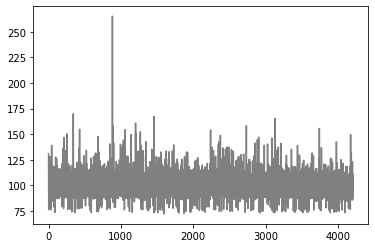

In [392]:
plt.plot(df_train1['y'],color='grey')

Skewness: 1.206526
Kurtosis: 7.910713


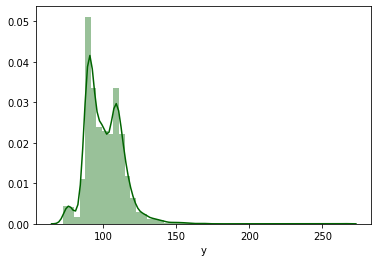

In [396]:
sns.distplot(df_train1['y'],color='darkgreen')
#skewness and kurtosis
print("Skewness: %f" % df_train1['y'].skew())
print("Kurtosis: %f" % df_train1['y'].kurt())

As we know the data is continous in nature we will not perform any kind of transformation techniques. 

In [397]:
numerical_feats = df_train1.dtypes[df_train1.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

Number of Numerical features:  358


### Action-3: Apply LabelEncoder()

In [398]:
df_train=(df_train1.drop(["y"],axis=1))
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_train[f].values)) 
        df_train[f] = lbl.transform(list(df_train[f].values))
        
        df_test=df_test1.copy()
        for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
            lbl.fit(list(df_test[f].values))
            df_test[f] = lbl.transform(list(df_test[f].values))
        

In [399]:
scaler= StandardScaler()

In [400]:
scaled1 = scaler.fit_transform(df_test)
scaled2 = scaler.fit_transform(df_train)

##### Plotting the scaled Data 

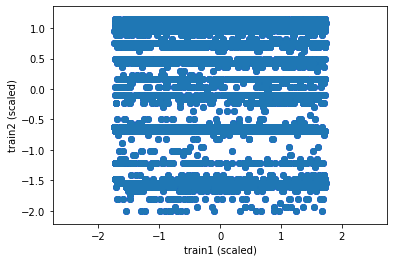

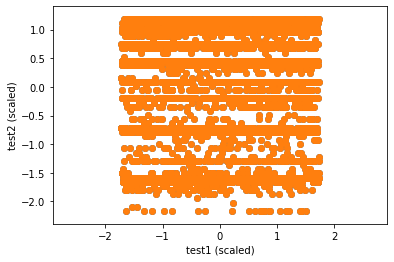

In [403]:

plt.scatter(scaled1[:,0], scaled1[:,1],color='blue')
plt.axis('equal')
plt.xlabel('train1 (scaled)')
plt.ylabel('train2 (scaled)')
plt.show(plt.scatter(scaled1[:,0], scaled1[:,1]))

plt.scatter(scaled2[:,0], scaled2[:,1])
plt.axis('equal')
plt.xlabel('test1 (scaled)')
plt.ylabel('test2 (scaled)')
plt.show(plt.scatter(scaled2[:,0], scaled2[:,1]))


### Action 4: Performing Dimension Reduction by using PCA 

In [404]:
pca1=PCA()
pca1.fit(scaled1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [405]:
pca1.components_

array([[-2.71445239e-03, -5.18968198e-02,  3.53664002e-02, ...,
         2.49170668e-03, -8.78130465e-04, -3.77787565e-03],
       [ 1.18362163e-03, -4.69932627e-02,  8.63110998e-02, ...,
        -3.41833591e-03, -1.65505661e-03,  4.04809811e-03],
       [ 1.36195549e-03, -7.66822019e-02,  1.05893566e-01, ...,
        -4.35026601e-03,  1.04231135e-03,  1.41771427e-02],
       ...,
       [-0.00000000e+00,  1.04083409e-17, -5.93831585e-17, ...,
        -5.85469173e-18, -1.38777878e-17,  1.22800228e-01],
       [ 0.00000000e+00,  3.43115886e-17, -1.55390369e-16, ...,
        -6.93889390e-18,  4.16333634e-17,  1.93331899e-01],
       [-0.00000000e+00,  7.24351405e-17, -7.67201869e-18, ...,
        -2.16162808e-18,  6.85215773e-17,  1.55574566e-01]])

In [406]:
pca2=PCA()
pca2.fit(scaled2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [407]:
pca2.components_

array([[ 3.01682497e-03, -5.35872622e-02,  3.02902294e-02, ...,
         2.54678049e-03, -1.03787172e-03, -3.82876840e-03],
       [ 7.94018529e-04, -4.40296627e-02,  7.64586666e-02, ...,
        -6.26812800e-03, -1.09320741e-04,  2.65841963e-03],
       [ 4.32218101e-03, -7.54973017e-02,  1.10415384e-01, ...,
        -6.28577538e-03,  3.30526194e-03,  1.49548425e-02],
       ...,
       [ 0.00000000e+00,  7.18905794e-17, -8.68959114e-17, ...,
        -4.85722573e-17,  9.02056208e-17,  1.29628206e-01],
       [ 0.00000000e+00,  2.24776063e-16, -9.81469892e-17, ...,
        -3.81639165e-17, -3.12250226e-17, -2.86598363e-02],
       [ 0.00000000e+00,  1.75497725e-16, -1.42242052e-16, ...,
         3.98986399e-17, -3.38271078e-17,  1.93417275e-02]])

##### Plotting the scaled data after Dimension Reduction

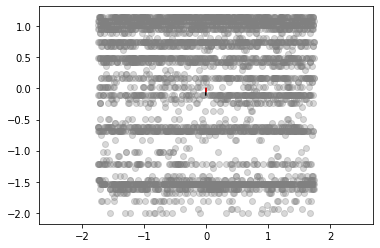

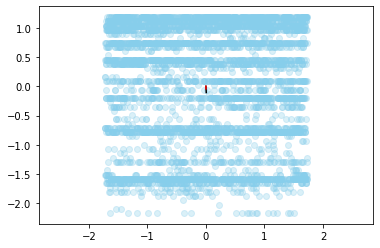

In [422]:
plt.scatter(scaled1[:,0], scaled1[:,1], alpha=0.3,color='grey')
plt.plot([0, 2*pca1.components_[0,0]], [0, 2*pca1.components_[0,1]], 'k')
plt.plot([0, pca1.components_[1,0]], [0, pca1.components_[1,1]], 'r')
plt.axis('equal',color='red')
plt.show()

plt.scatter(scaled2[:,0], scaled2[:,1], alpha=0.3,color='skyblue')
plt.plot([0, 2*pca2.components_[0,0]], [0, 2*pca2.components_[0,1]], 'k')
plt.plot([0, pca2.components_[1,0]], [0, pca2.components_[1,1]], 'r')
plt.axis('equal',color='red')
plt.show()


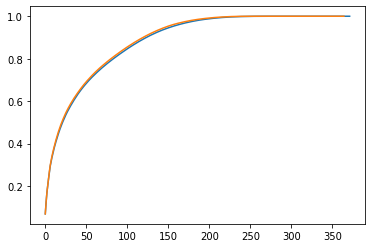

In [423]:
# Cumulative explained variance
cumulative_explained_variance_train = np.cumsum(pca1.explained_variance_ratio_)
cumulative_explained_variance_test = np.cumsum(pca2.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance_train)), cumulative_explained_variance_train)
plt.plot(range(len(cumulative_explained_variance_test)), cumulative_explained_variance_test)

Both depicts the same plot. To target 80% accuracy, lets have 100 variables for both datasets

In [424]:
cumulative_explained_variance_train[100]
cumulative_explained_variance_test[100]

0.8553671061496884

In [425]:
pca1=PCA(n_components=100)
PC_items_train = pca1.fit_transform(scaled1)
print(PC_items_train.shape)

pca2=PCA(n_components=100)
PC_items_test = pca2.fit_transform(scaled2)
print(PC_items_test.shape)


(4209, 100)
(4209, 100)


###### Put PC_items into train & test dataframe

In [427]:
items_pca_train = pd.DataFrame(PC_items_train)
items_pca_train.columns = ['PC{}'.format(i + 1) for i in range(PC_items_train.shape[1])]
items_pca_train.index = df_train.index
items_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,8.105354,20.962261,-8.863073,1.459892,1.948954,-0.668192,-1.414740,-0.231226,1.487539,-2.227357,...,-0.965693,0.259094,0.278553,-0.366965,-0.433187,0.808736,-0.566551,-0.335443,0.706252,-1.004398
1,1.078995,-4.728954,-10.079745,-1.898268,1.052619,6.580577,0.880176,6.001239,1.663453,2.934372,...,-0.351149,0.001230,0.133205,0.767016,-0.249519,-0.053542,-0.009282,-0.282432,0.626128,-0.024322
2,5.838110,18.636838,-6.450771,-1.307239,2.081227,-0.418742,-0.634459,4.946503,0.265582,1.500096,...,0.756953,0.139206,0.158486,0.117079,-0.220748,-0.248898,-0.016616,-0.222814,0.100625,1.303113
3,6.734101,21.255474,-8.792601,2.157302,2.024582,-1.771757,-0.893341,-1.466507,1.021403,-3.000962,...,14.747306,-7.996579,4.228754,2.012203,-0.275391,8.913682,4.241361,2.536229,-4.702109,4.363831
4,-1.787163,1.094261,5.744360,-2.985467,-1.445461,-0.083643,0.668792,2.239652,0.556260,0.997864,...,0.764217,-0.525792,-0.356243,0.898813,0.481337,0.819200,-0.160031,0.781915,-0.114605,-1.234899


In [428]:
items_pca_test= pd.DataFrame(PC_items_test)
items_pca_test.columns = ['PC{}'.format(i + 1) for i in range(PC_items_test.shape[1])]
items_pca_test.index = df_test.index
items_pca_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,12.247943,-2.946169,-0.968899,2.013799,-1.536962,-3.580110,9.039394,-3.627298,-16.145176,8.522943,...,-0.601647,-0.621570,-0.509023,0.663896,1.062090,0.030325,0.076562,0.760662,-0.072253,-0.024798
1,-0.107612,0.364736,0.989965,1.157338,-2.591086,-0.029929,1.010099,-0.590316,-0.504217,0.163684,...,0.484631,-0.109525,-2.113404,-0.707451,1.208006,1.025653,2.258236,0.378792,1.431961,-0.820707
2,10.272906,21.103246,-5.022209,-4.472226,0.883318,2.575157,1.156996,3.640229,-0.925955,1.320524,...,2.434694,-1.321326,-2.798465,-1.328186,-2.532527,0.316599,0.437172,-5.019454,1.947794,2.102514
3,7.356681,21.366687,-6.007823,0.231598,1.996342,0.701227,0.432175,-0.053664,0.237010,2.899748,...,1.922010,0.588965,0.987616,0.219785,0.647023,-0.434721,-0.286490,1.937300,0.464616,0.041656
4,6.570842,21.440449,-6.555669,0.933567,1.997609,-0.014715,-0.976836,-0.243927,0.928093,0.787362,...,2.302512,-0.050955,-0.479151,-0.453023,-1.075578,0.072451,-0.219529,-2.500098,2.836648,1.015709


In [429]:
print(items_pca_train.shape)
print(items_pca_test.shape)

(4209, 100)
(4209, 100)


###### Plotting transformed dataset

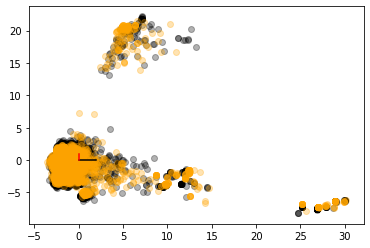

In [439]:
plt.scatter(PC_items_train[:,0], PC_items_train[:,1], alpha=0.3, color='k')
plt.scatter(PC_items_test[:,0], PC_items_test[:,1], alpha=0.3, color='orange')
plt.plot([0, 2], [0, 0], 'k')
plt.plot([0, 0], [0, 1], 'r')
plt.show()

In [440]:
pca1.explained_variance_ratio_.sum()

0.8417194463821848

In [441]:
pca2.explained_variance_ratio_.sum()

0.8502486806728594

In [442]:
Y = (df_train1['y'].values)
X_train=items_pca_train.copy()
X_test=items_pca_test.copy()
y_test=Y.copy()

### Action 4: Perform XGBoost Regression Model and predict the test data
##### Before performing XGBoost lets perform lasso, Ridge and Elastic Net ans check the RMSE and R2 values 

In [443]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.000999, max_iter=50000,normalize=True)
ridgereg.fit(X_train,Y)
y_pred=ridgereg.predict(X_train)
print("***RIDGE REGRESSION MODEL***\n")
print("RMSE Value for train dataset: ", (sqrt(mean_squared_error(Y,y_pred))))
print("RMSE Value for test dataset: ", (sqrt(mean_squared_error(y_test,y_pred))))
print('R2Value/Coefficient of Determination:{}'.format(ridgereg.score(X_test,y_test)))

***RIDGE REGRESSION MODEL***

RMSE Value for train dataset:  12.319223108715557
RMSE Value for test dataset:  12.319223108715557
R2Value/Coefficient of Determination:-0.07249730297576118


In [444]:
from sklearn.linear_model import Lasso
lassoreg=Lasso(alpha=0.000999, max_iter=50000,normalize=True)
lassoreg.fit(X_train,Y)
y_pred=lassoreg.predict(X_train)
print("***LASSO REGRESSION MODEL***\n")
print("RMSE Value for train dataset: ", (sqrt(mean_squared_error(Y,y_pred))))
print("RMSE Value for test dataset: ", (sqrt(mean_squared_error(y_test,y_pred))))
print('R2Value/Coefficient of Determination:{}'.format(lassoreg.score(X_test,y_test)))

***LASSO REGRESSION MODEL***

RMSE Value for train dataset:  12.334148280983978
RMSE Value for test dataset:  12.334148280983978
R2Value/Coefficient of Determination:-0.05203781450209367


In [445]:
from sklearn.linear_model import ElasticNet
ENreg=ElasticNet(alpha=0.000999, max_iter=50000,normalize=True)
ENreg.fit(X_train,Y)
y_pred=ENreg.predict(X_train)
print("***ELASTIC NET REGRESSION MODEL***\n")
print("RMSE Value for train dataset: ", (sqrt(mean_squared_error(Y,y_pred))))
print("RMSE Value for test dataset: ", (sqrt(mean_squared_error(y_test,y_pred))))
print('R2Value/Coefficient of Determination:{}'.format(ENreg.score(X_test,y_test)))


***ELASTIC NET REGRESSION MODEL***

RMSE Value for train dataset:  12.498268858407224
RMSE Value for test dataset:  12.498268858407224
R2Value/Coefficient of Determination:-0.009613566304350618


### Performing XGBoost Regression Model

In [378]:
import xgboost as xgb
XBreg = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

XBreg.fit(X_train, Y)

[19:58:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=7200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.9,
             reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
             subsample=0.2, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [379]:
y_pred = XBreg.predict(X_train)
print("XGBoost score on training set: ", (sqrt(mean_squared_error(Y,y_pred))))

XGBoost score on training set:  0.27629523806940715


#### It looks like XGBoost model performed beeter than previous three models. Hence perform prediction on test data

In [380]:
y_pred_xgb = XBreg.predict(X_test)
XBreg_ex = np.exp(y_pred_xgb)

In [381]:
pred1 = pd.DataFrame({ 'y':y_pred_xgb})

In [382]:
pred1.head()

,y
0,137.300400
1,113.421257
2,127.376320
3,150.732880
4,130.323929


#### pred1 can be used as final predicted dataset of the target variable